In [2]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d7989bfa5db269e7c79bd98f23dcd03d97a9e3a2d23ac1c91880494ca5d7db93
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels
from scipy import stats
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import ancova
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

Data Cleaning

In [ ]:
eda_data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
eda_data

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [ ]:
crime_data = eda_data.groupby(['Occurrence_Category'],as_index=False).size()
crime_data.rename(columns = {'size':'count'},inplace = True)
crime_data

,Occurrence_Category,count
0,Assault,7726
1,Assault & Other crimes against persons,7235
2,Break & Enter,916
3,Break and Enter,868
4,Crimes against Children,69
5,Drug Related,2751
6,"FTA/FTC, Compliance Check & Parollee",3877
7,FTA/FTC/Compliance Check/Parollee,4246
8,Fraud,474
9,Harassment & Threatening,1268


In [ ]:
null_data = eda_data.isnull().sum()
notnull_data = eda_data.notnull().sum()
null = pd.DataFrame({'attribute':null_data.index, 'null':null_data.values})
notnull = pd.DataFrame({'attribute':notnull_data.index, 'notnull':notnull_data.values})
df = pd.merge(null, notnull, on = ['attribute'])
df

,attribute,null,notnull
0,Arrest_Year,0,65276
1,Arrest_Month,0,65276
2,EventID,0,65276
3,ArrestID,469,64807
4,PersonID,0,65276
5,Perceived_Race,4,65272
6,Sex,0,65276
7,Age_group__at_arrest_,24,65252
8,Youth_at_arrest__under_18_years,0,65276
9,ArrestLocDiv,0,65276


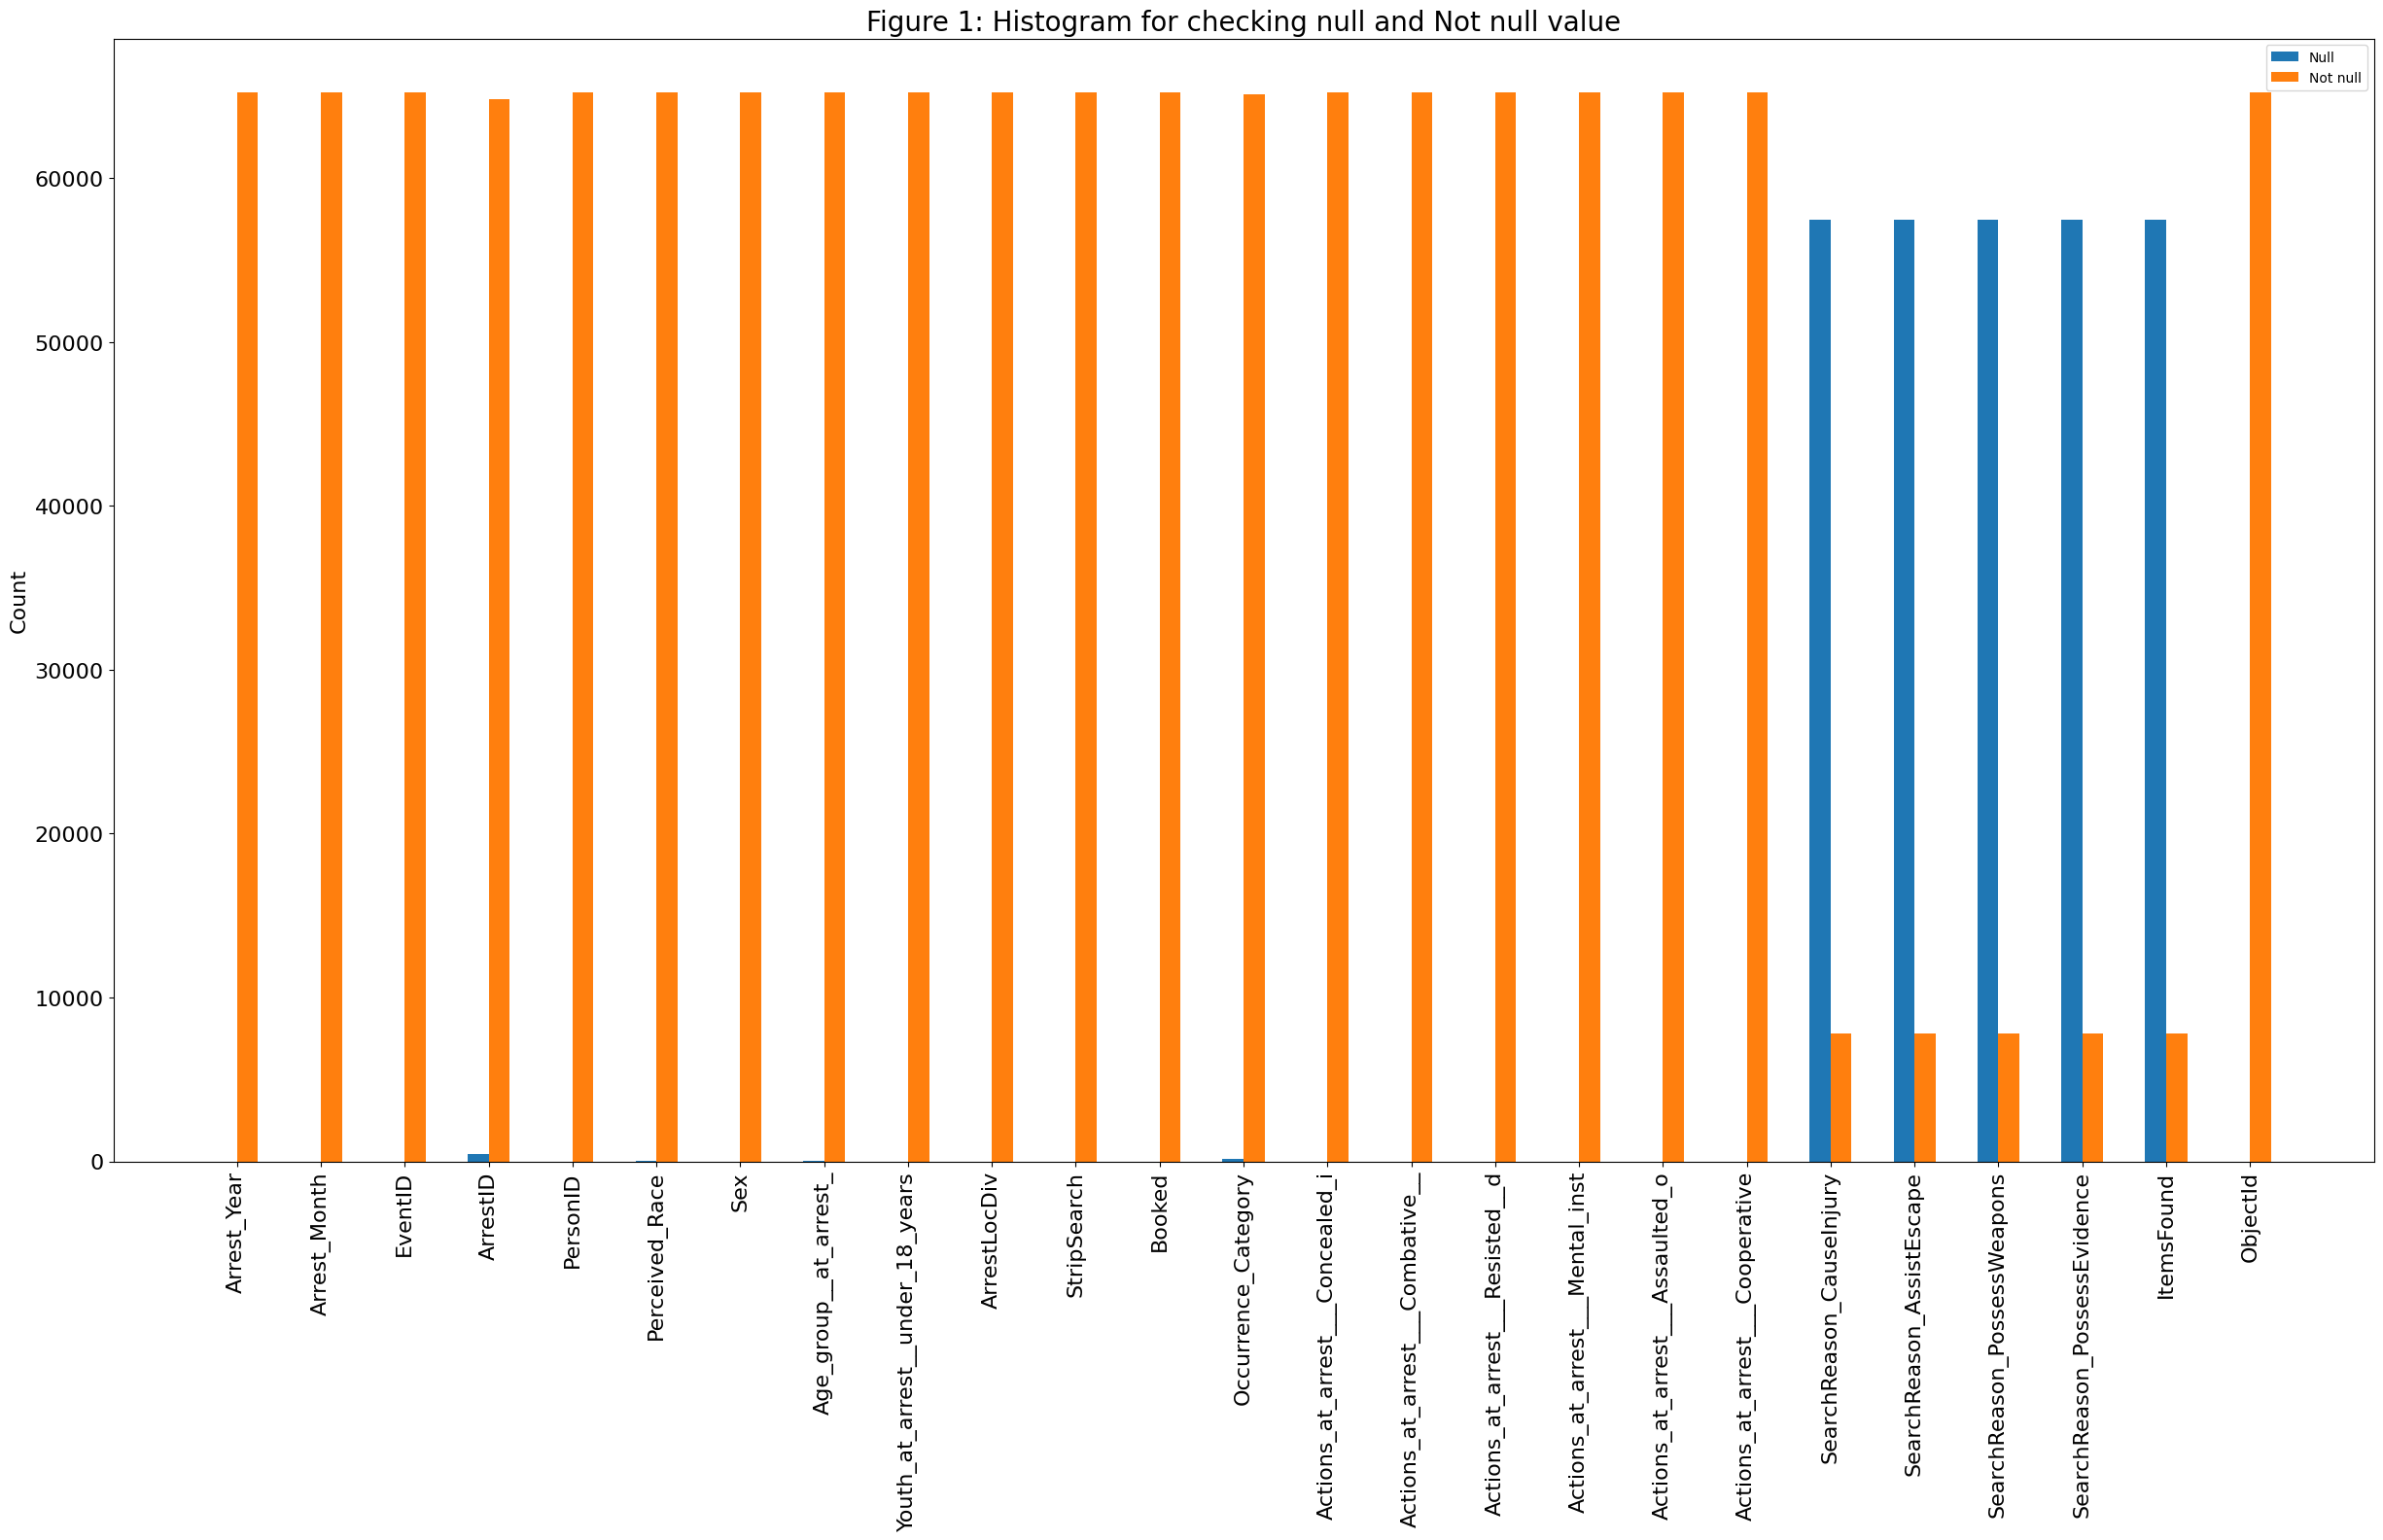

In [ ]:
fig = plt.figure(figsize = (30,15))
label1 = df['attribute']
x = np.arange(len(label1))
width = 0.25 
plt.bar(x - width/2, df['null'], width, label='Null')
plt.bar(x + width/2, df['notnull'], width, label='Not null')
plt.legend()
plt.ylabel('Count',size=16)
plt.title('Figure 1: Histogram for checking null and Not null value',size=20)
plt.yticks(size=16)
plt.xticks(x, labels=label1, rotation=90, size=16)
plt.show()

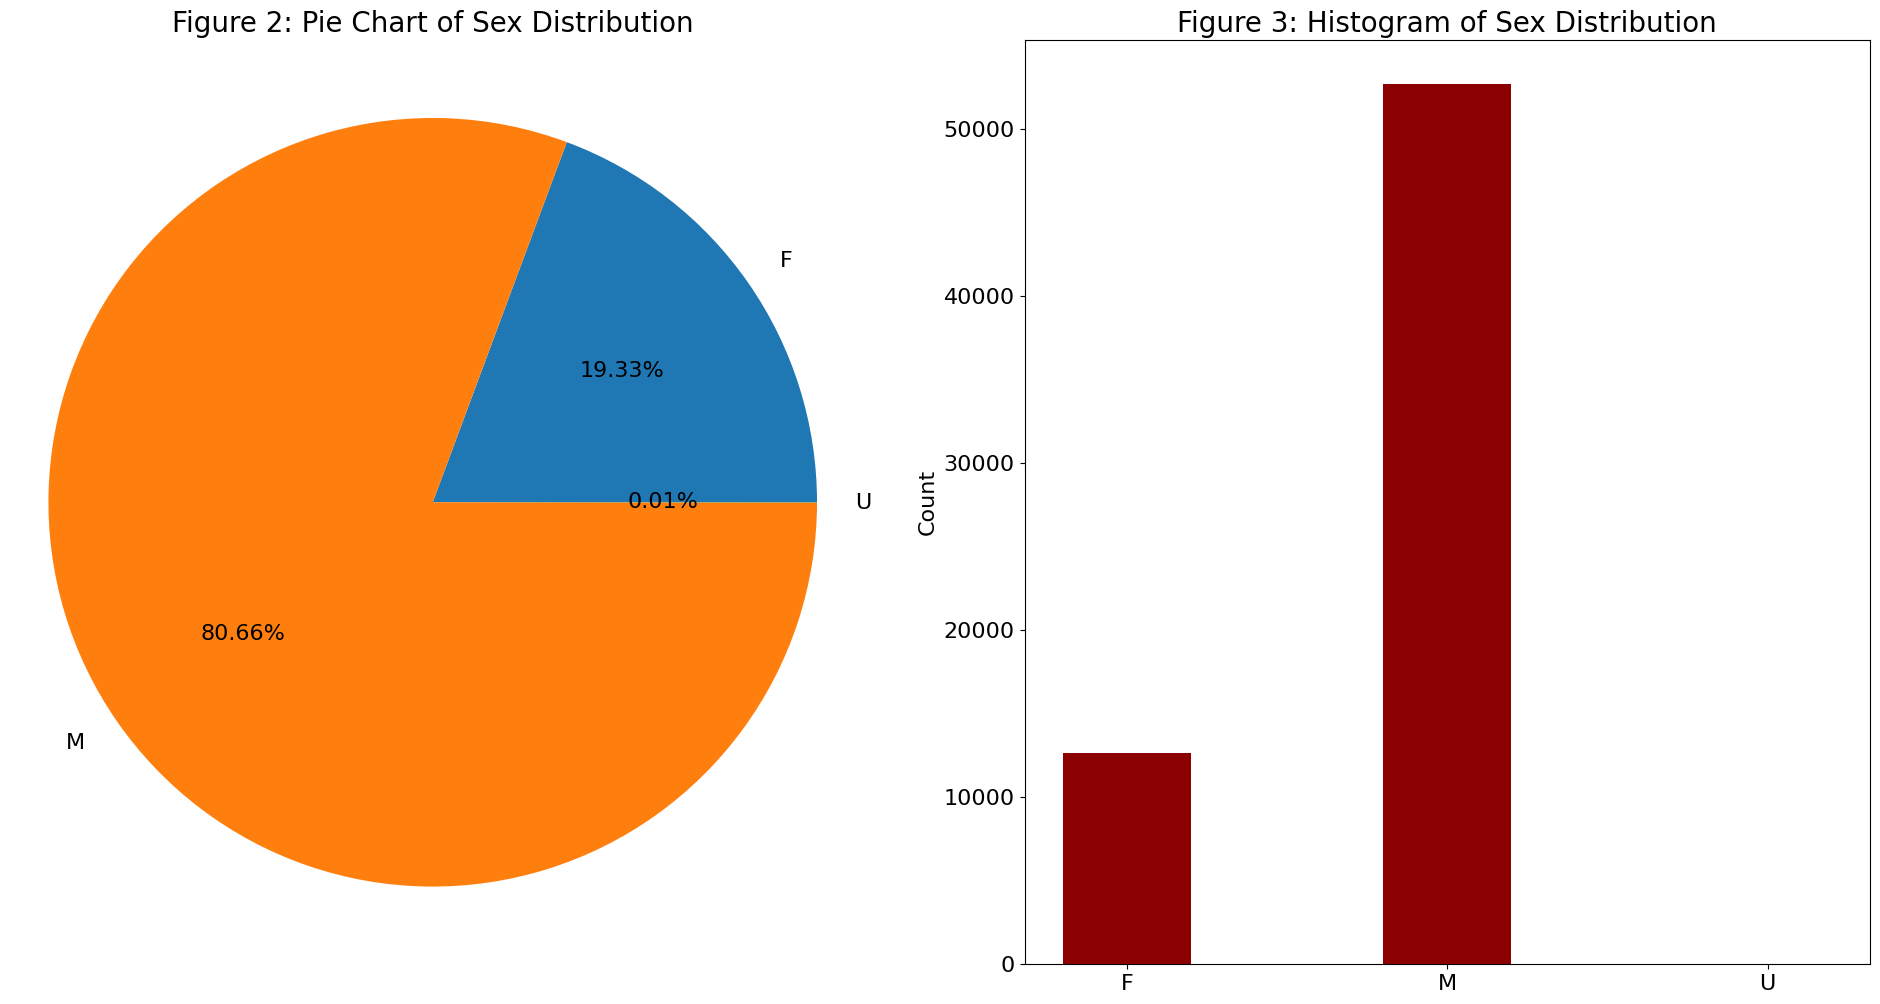

In [ ]:
sex_data = eda_data.groupby(['Sex'],as_index=False).size()
sex_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.title("Figure 2: Pie Chart of Sex Distribution",size=20)
plt.pie(sex_data['count'],labels=sex_data['Sex'],radius=80,autopct='%1.2f%%',textprops={'fontsize':16,'color':'k'})
plt.axis('equal')
plt.subplot(1, 2, 2)
plt.bar(sex_data['Sex'], height = sex_data['count'],color ='darkred',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Figure 3: Histogram of Sex Distribution",size=20)
plt.show()

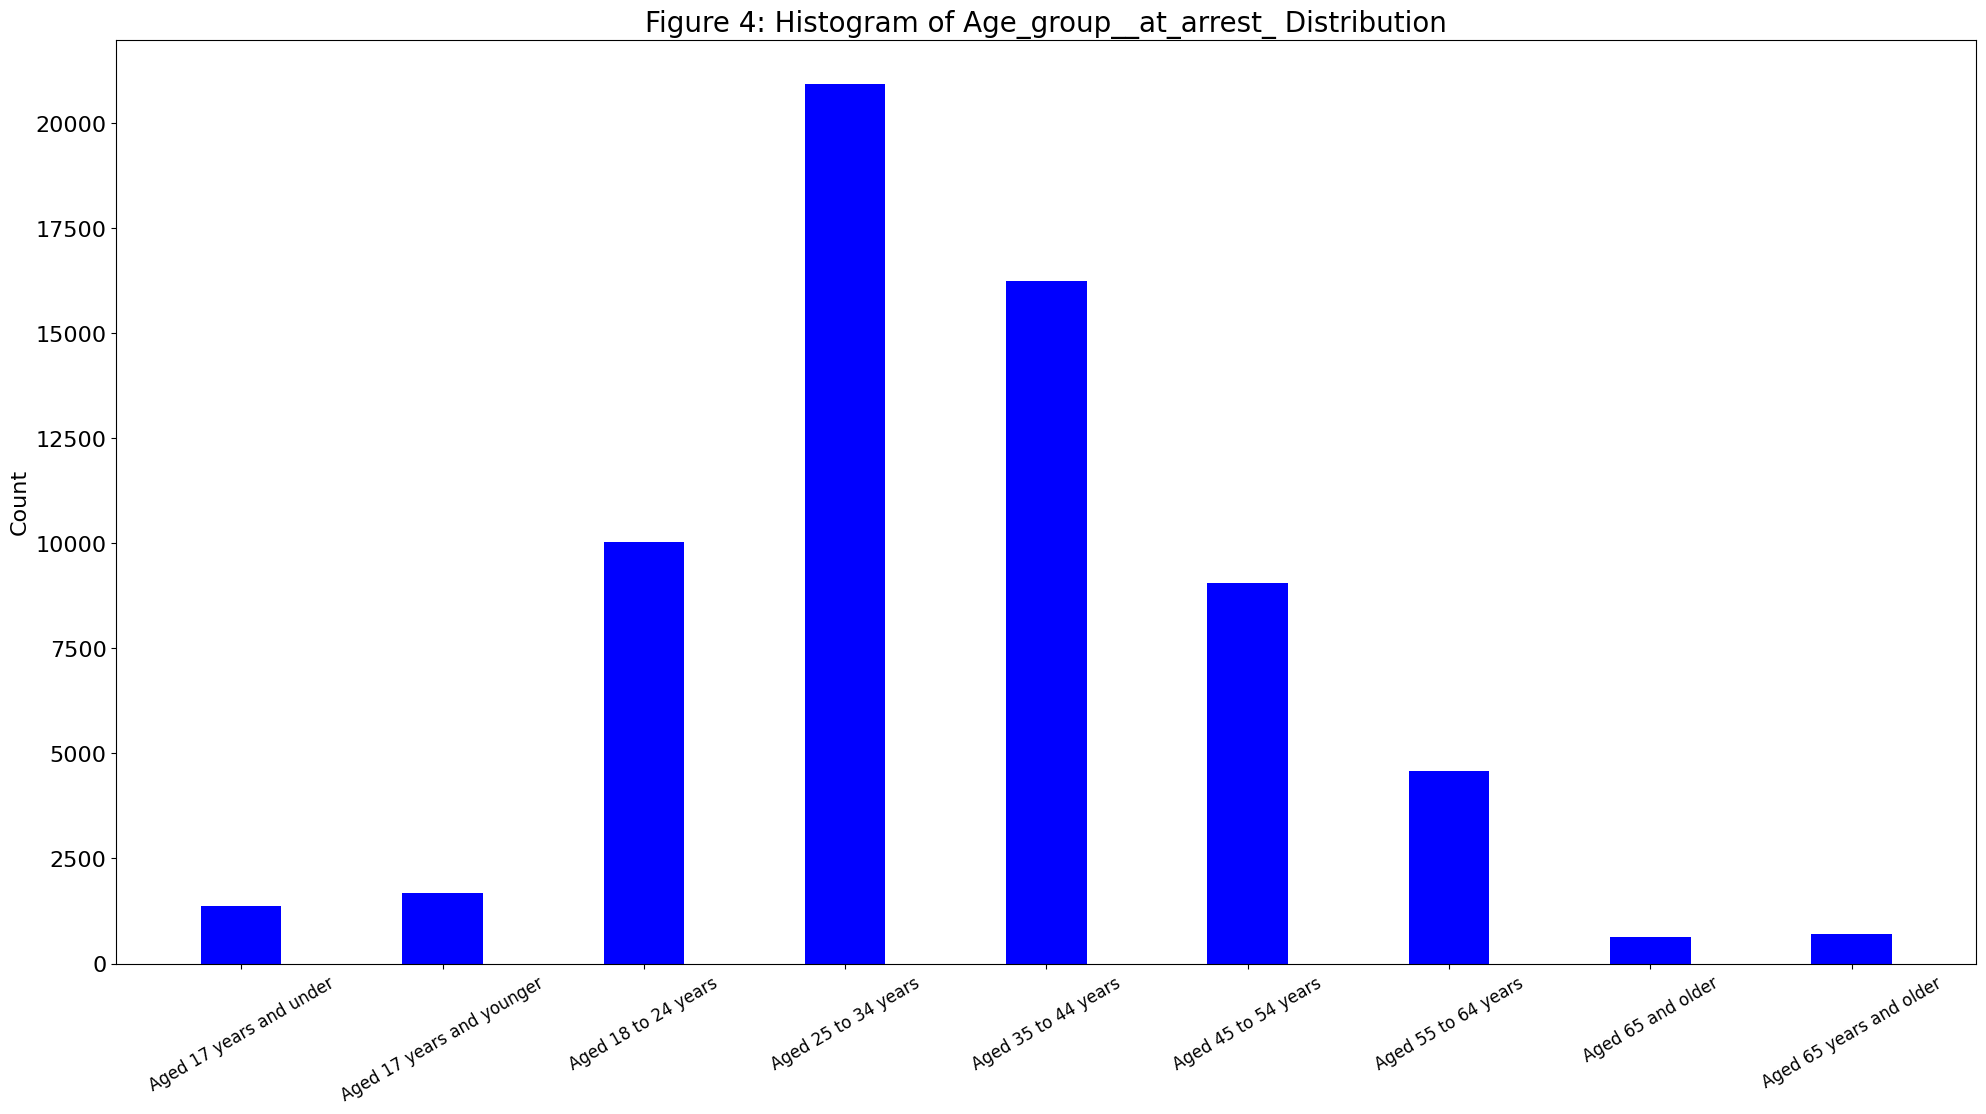

In [ ]:
age_data = eda_data.groupby(['Age_group__at_arrest_'],as_index=False).size()
age_data.dropna()
age_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.bar(age_data['Age_group__at_arrest_'], height = age_data['count'],color ='blue',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=12,rotation = 30)
plt.yticks(size=16)
plt.title("Figure 4: Histogram of Age_group__at_arrest_ Distribution", size = 20)
plt.show()

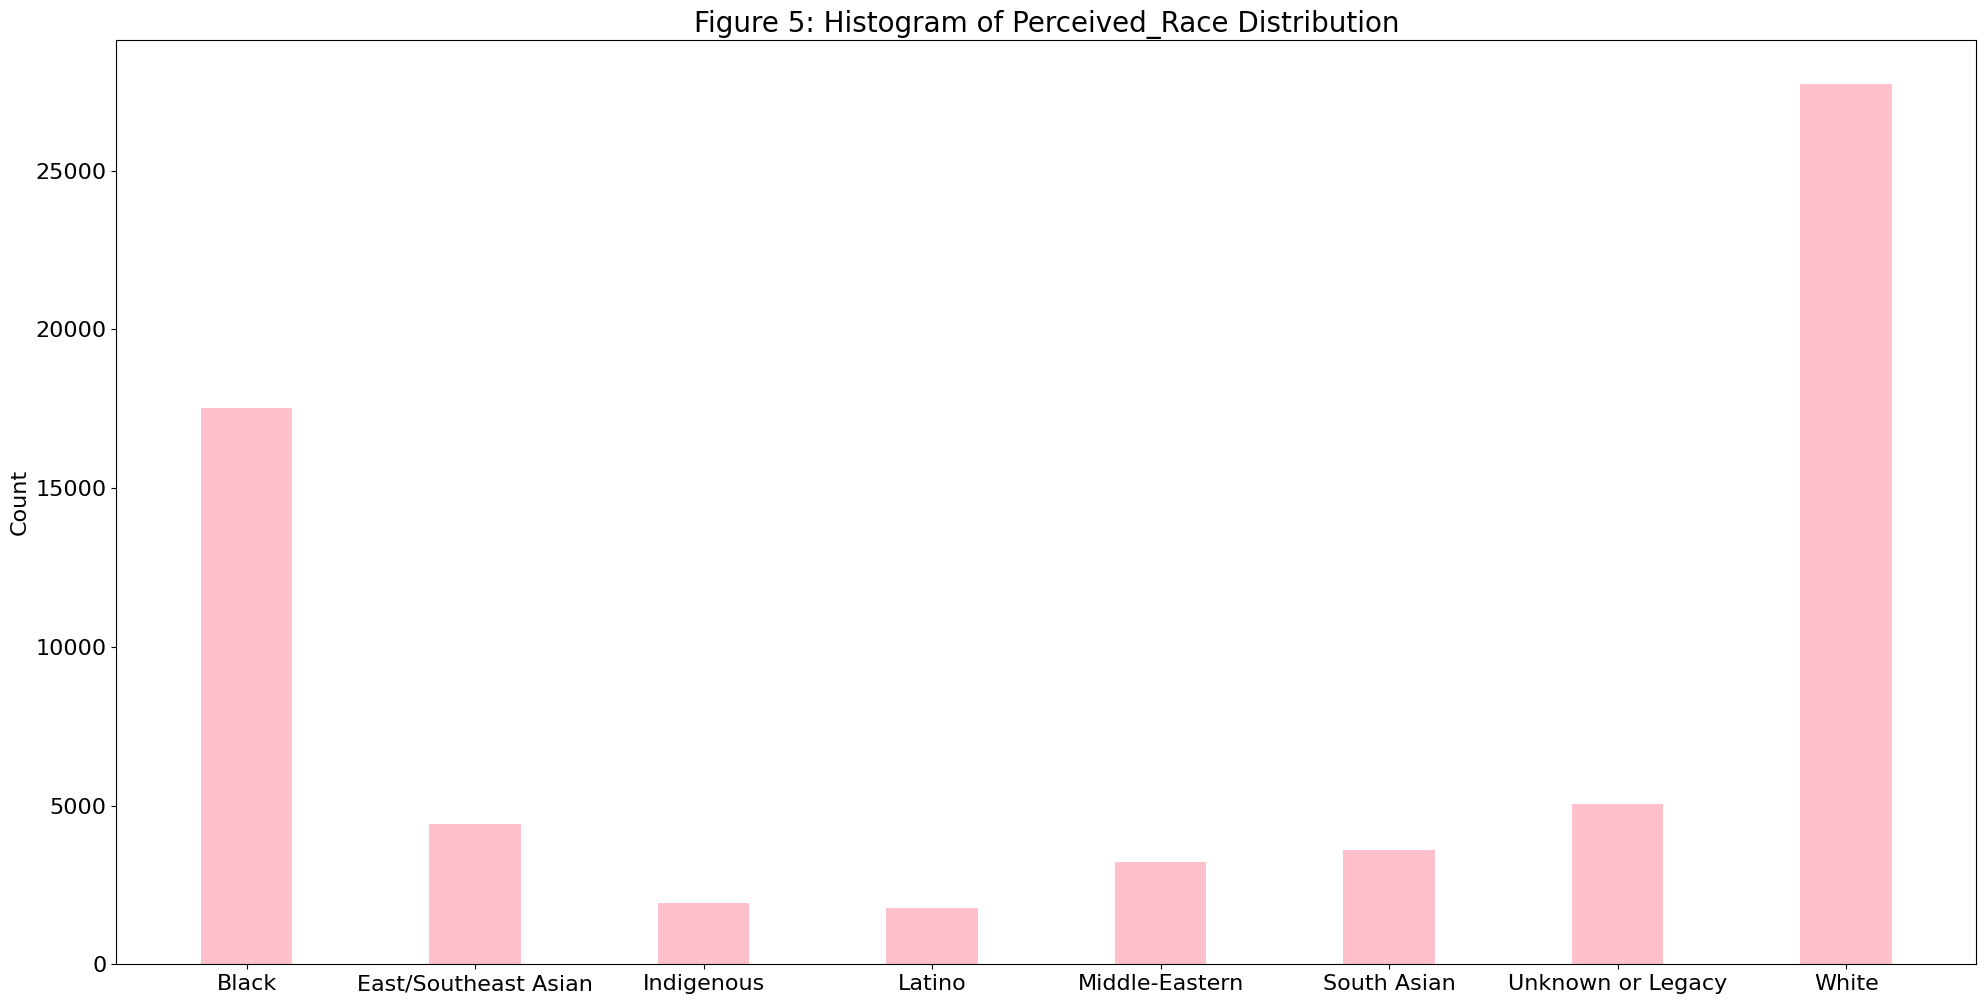

In [ ]:
race_data = eda_data.groupby(['Perceived_Race'],as_index=False).size()
race_data.dropna()
race_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.bar(race_data['Perceived_Race'], height = race_data['count'],color ='pink',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Figure 5: Histogram of Perceived_Race Distribution", size = 20)
plt.show()

Data Selection

In [ ]:
def selectdata(filename):
  data = pd.read_csv(filename)
  new_data = data[['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked','StripSearch','Actions_at_arrest___Cooperative']]
  new_data[['Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_']]=new_data[['Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_']].astype('string')
  new_data = (new_data[new_data['Sex'].str.contains('U') == False])
  new_data.loc[new_data.Age_group__at_arrest_ == 'Aged 65 and older','Age_group__at_arrest_'] = 'Aged 65 years and older'
  new_data.loc[new_data.Age_group__at_arrest_ == 'Aged 17 years and younger','Age_group__at_arrest_'] = 'Aged 17 years and under'
  new_data.loc[new_data.Youth_at_arrest__under_18_years == 'Youth (aged 17 and younger)','Youth_at_arrest__under_18_years'] = 'Youth (aged 17 years and under)'
  new_data = new_data.dropna()
  return new_data

In [ ]:
data = selectdata('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Actions_at_arrest___Cooperative
0,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,1
1,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,0
2,2020,Oct-Dec,Unknown or Legacy,M,Not a youth,Aged 35 to 44 years,1,0,0
3,2021,Jan-Mar,Black,M,Not a youth,Aged 25 to 34 years,0,0,0
4,2021,Jan-Mar,South Asian,M,Not a youth,Aged 25 to 34 years,1,0,0
...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,Indigenous,F,Not a youth,Aged 25 to 34 years,0,0,0
65272,2021,Oct-Dec,South Asian,M,Not a youth,Aged 35 to 44 years,1,0,0
65273,2021,Oct-Dec,White,F,Not a youth,Aged 45 to 54 years,0,0,0
65274,2021,Oct-Dec,Unknown or Legacy,M,Youth (aged 17 years and under),Aged 17 years and under,0,0,1


Data Preprocessing

In [ ]:
def data_preprocess(data):
  data['Perceived_Race_num'] = pd.factorize(data['Perceived_Race'])[0]
  data['Sex_num'] = pd.factorize(data['Sex'])[0]
  data['Age_group_num'] = 0
  data.loc[data.Age_group__at_arrest_ == 'Aged 18 to 24 years','Age_group_num'] = 1
  data.loc[data.Age_group__at_arrest_ == 'Aged 25 to 34 years','Age_group_num'] = 2
  data.loc[data.Age_group__at_arrest_ == 'Aged 35 to 44 years','Age_group_num'] = 3
  data.loc[data.Age_group__at_arrest_ == 'Aged 45 to 54 years','Age_group_num'] = 4
  data.loc[data.Age_group__at_arrest_ == 'Aged 55 to 64 years','Age_group_num'] = 5
  data.loc[data.Age_group__at_arrest_ == 'Aged 65 years and older','Age_group_num'] = 6
  
  return data

In [ ]:
data = data_preprocess(data)
data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Actions_at_arrest___Cooperative,Perceived_Race_num,Sex_num,Age_group_num
0,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,1,0,0,3
1,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,0,0,0,3
2,2020,Oct-Dec,Unknown or Legacy,M,Not a youth,Aged 35 to 44 years,1,0,0,1,0,3
3,2021,Jan-Mar,Black,M,Not a youth,Aged 25 to 34 years,0,0,0,2,0,2
4,2021,Jan-Mar,South Asian,M,Not a youth,Aged 25 to 34 years,1,0,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,Indigenous,F,Not a youth,Aged 25 to 34 years,0,0,0,4,1,2
65272,2021,Oct-Dec,South Asian,M,Not a youth,Aged 35 to 44 years,1,0,0,3,0,3
65273,2021,Oct-Dec,White,F,Not a youth,Aged 45 to 54 years,0,0,0,0,1,4
65274,2021,Oct-Dec,Unknown or Legacy,M,Youth (aged 17 years and under),Aged 17 years and under,0,0,1,1,0,0


R1: Actions_at_arrest___Cooperative, Booked Count, controlled race+sex+age group

In [ ]:
BookedArrest_data = data[data['Booked']==1].groupby(['Arrest_Year','Perceived_Race','Perceived_Race_num','Sex','Sex_num','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Age_group_num'],as_index=False).size()
BookedArrest_data.rename(columns = {'size':'Booked_count'},inplace = True)
BookedArrest_data.dropna()

,Arrest_Year,Perceived_Race,Perceived_Race_num,Sex,Sex_num,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Age_group_num,Booked_count
0,2020,Black,2,F,1,Not a youth,Aged 18 to 24 years,1,168
1,2020,Black,2,F,1,Not a youth,Aged 25 to 34 years,2,235
2,2020,Black,2,F,1,Not a youth,Aged 35 to 44 years,3,121
3,2020,Black,2,F,1,Not a youth,Aged 45 to 54 years,4,68
4,2020,Black,2,F,1,Not a youth,Aged 55 to 64 years,5,14
...,...,...,...,...,...,...,...,...,...
206,2021,White,0,M,0,Not a youth,Aged 35 to 44 years,3,1743
207,2021,White,0,M,0,Not a youth,Aged 45 to 54 years,4,1018
208,2021,White,0,M,0,Not a youth,Aged 55 to 64 years,5,500
209,2021,White,0,M,0,Not a youth,Aged 65 years and older,6,121


In [ ]:
BookedArrest_data1 = data[data['Actions_at_arrest___Cooperative']==1].groupby(['Arrest_Year','Perceived_Race','Perceived_Race_num','Sex','Sex_num','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Age_group_num'],as_index=False).size()
BookedArrest_data1.rename(columns = {'size':'Cooperative_count'},inplace = True)
BookedArrest_data1.dropna()
BookedArrest_data['Cooperative_count'] = BookedArrest_data1['Cooperative_count']
origin_data = BookedArrest_data
BookedArrest_data

,Arrest_Year,Perceived_Race,Perceived_Race_num,Sex,Sex_num,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Age_group_num,Booked_count,Cooperative_count
0,2020,Black,2,F,1,Not a youth,Aged 18 to 24 years,1,168,145
1,2020,Black,2,F,1,Not a youth,Aged 25 to 34 years,2,235,178
2,2020,Black,2,F,1,Not a youth,Aged 35 to 44 years,3,121,112
3,2020,Black,2,F,1,Not a youth,Aged 45 to 54 years,4,68,59
4,2020,Black,2,F,1,Not a youth,Aged 55 to 64 years,5,14,16
...,...,...,...,...,...,...,...,...,...,...
206,2021,White,0,M,0,Not a youth,Aged 35 to 44 years,3,1743,72
207,2021,White,0,M,0,Not a youth,Aged 45 to 54 years,4,1018,25
208,2021,White,0,M,0,Not a youth,Aged 55 to 64 years,5,500,45
209,2021,White,0,M,0,Not a youth,Aged 65 years and older,6,121,141


Text(0.5, 1.0, 'Figure 6: Cooperative Count Correlation Heatmap')

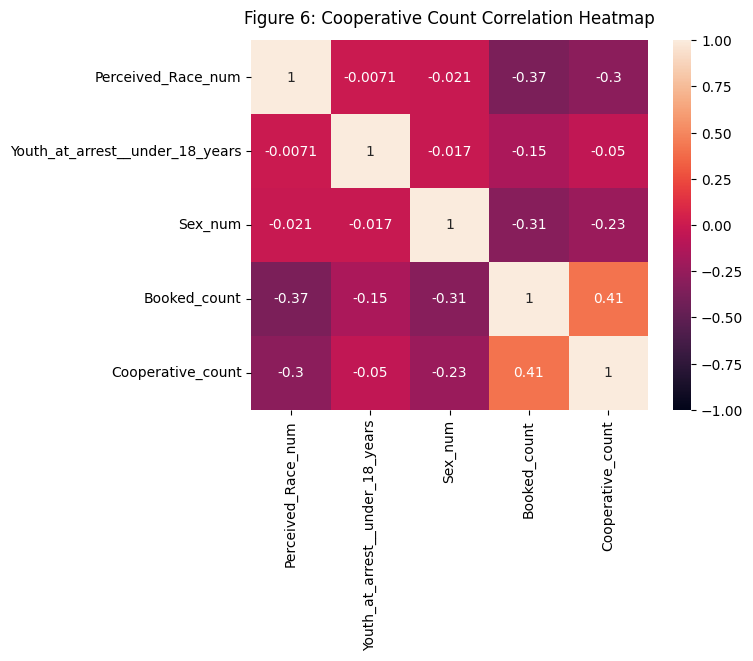

In [ ]:
BookedArrest_data['Youth_at_arrest__under_18_years'] = pd.factorize(BookedArrest_data['Youth_at_arrest__under_18_years'])[0]
booked_heat = BookedArrest_data[['Perceived_Race_num','Youth_at_arrest__under_18_years','Sex_num','Booked_count','Cooperative_count']]
heatmap1 = sns.heatmap(booked_heat.corr(),vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Figure 6: Cooperative Count Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

t-test - cooperative count and sex

In [ ]:
F = BookedArrest_data[BookedArrest_data['Sex'] == 'F']['Cooperative_count']
M = BookedArrest_data[BookedArrest_data['Sex'] == 'M']['Cooperative_count']
statistic, pvalue = stats.ttest_1samp(M, F.mean())
pvalue

0.00022879999736373656

In [ ]:
BookedArrest_data

,Arrest_Year,Perceived_Race,Perceived_Race_num,Sex,Sex_num,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Age_group_num,Booked_count,Cooperative_count
0,2020,Black,2,F,1,0,Aged 18 to 24 years,1,168,145
1,2020,Black,2,F,1,0,Aged 25 to 34 years,2,235,178
2,2020,Black,2,F,1,0,Aged 35 to 44 years,3,121,112
3,2020,Black,2,F,1,0,Aged 45 to 54 years,4,68,59
4,2020,Black,2,F,1,0,Aged 55 to 64 years,5,14,16
...,...,...,...,...,...,...,...,...,...,...
206,2021,White,0,M,0,0,Aged 35 to 44 years,3,1743,72
207,2021,White,0,M,0,0,Aged 45 to 54 years,4,1018,25
208,2021,White,0,M,0,0,Aged 55 to 64 years,5,500,45
209,2021,White,0,M,0,0,Aged 65 years and older,6,121,141


In [ ]:
table_data = BookedArrest_data[['Perceived_Race','Sex','Booked_count','Cooperative_count']]
table_mean = table_data.groupby(['Perceived_Race','Sex']).mean()
table_mean

Booked_count  Cooperative_count
Perceived_Race       Sex                                 
Black                F       96.142857         107.500000
                     M      594.571429         433.785714
East/Southeast Asian F       16.428571          41.357143
                     M      133.142857         132.714286
Indigenous           F       26.500000          24.250000
                     M       53.928571          33.071429
Latino               F       11.500000          12.300000
                     M       60.714286          30.142857
Middle-Eastern       F       11.181818          43.454545
                     M      107.785714          48.857143
South Asian          F       15.750000          57.000000
                     M      113.428571          71.285714
Unknown or Legacy    F       30.833333          49.583333
                     M      147.571429          95.071429
White                F      200.000000         127.642857
                     M      818.285714         409.357143

Power Analysis - book sex

In [ ]:
F_coop = BookedArrest_data[BookedArrest_data['Sex']=='F']
M_coop = BookedArrest_data[BookedArrest_data['Sex']=='M']
F_coopsize = F_coop['Cooperative_count']
M_coopsize = M_coop['Cooperative_count']
M_coopsize

7       731
8      1119
9       619
10      268
11      145
       ... 
206      72
207      25
208      45
209     141
210     445
Name: Cooperative_count, Length: 112, dtype: int64

In [ ]:
def Cohens_d (df1,df2):
  u1,u2 = np.mean(df1),np.mean(df2)
  n1,n2 = len(df1),len(df2)
  var1,var2 = np.var(df1,ddof=1),np.var(df2,ddof=1)
  numerator = ((n1-1)*var1)+((n2-1)*var2)
  denom = n1+n2-2
  re = np.sqrt(numerator/denom)
  return ((u1-u2)/re)

In [ ]:
effect_size_sex = Cohens_d(M_coopsize,F_coopsize)
sex_ratio = len(M_coopsize)/len(F_coopsize)
print('Effect size (Cohen\'s D) for sex:',sex_ratio)

Effect size (Cohen's D) for sex: 1.1313131313131313


In [ ]:
power_analysis = TTestIndPower()
nobs1 = power_analysis.solve_power(effect_size_sex, power=0.8, alpha=0.05, ratio = sex_ratio)
print('Sample Size of nobs1: %.3f' % nobs1, 'needed for female')
print("Actual sample size for male: ",len(F_coopsize))
nobs2 = sex_ratio*nobs1
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for male')
print("Actual sample size for female: ",len(M_coopsize))

Sample Size of nobs1: 66.644 needed for female
Actual sample size for male:  99
Sample Size of nobs2: 75.396 needed for male
Actual sample size for female:  112


In [ ]:
BookedArrest_data.loc[BookedArrest_data.Perceived_Race != 'White','Perceived_Race'] = "Not-White"

In [ ]:
table_data2 = BookedArrest_data[['Perceived_Race','Age_group__at_arrest_','Cooperative_count']]
table_mean2 = table_data2.groupby(['Perceived_Race','Age_group__at_arrest_']).mean()
table_mean2

Cooperative_count
Perceived_Race Age_group__at_arrest_                     
Not-White      Aged 17 years and under          46.520000
               Aged 18 to 24 years              71.428571
               Aged 25 to 34 years             109.392857
               Aged 35 to 44 years             112.250000
               Aged 45 to 54 years             121.750000
               Aged 55 to 64 years              91.520000
               Aged 65 years and older          48.476190
White          Aged 17 years and under         332.000000
               Aged 18 to 24 years              76.500000
               Aged 25 to 34 years              62.500000
               Aged 35 to 44 years             172.250000
               Aged 45 to 54 years             473.750000
               Aged 55 to 64 years             426.000000
               Aged 65 years and older         336.500000

In [ ]:
W_coop = BookedArrest_data[BookedArrest_data['Perceived_Race']=='White']
N_coop = BookedArrest_data[BookedArrest_data['Perceived_Race']=='Not-White']
W_coopsize = W_coop['Cooperative_count']
N_coopsize = N_coop['Cooperative_count']
N_coopsize

0      145
1      178
2      112
3       59
4       16
      ... 
192     54
193     25
194     21
195     28
196     54
Name: Cooperative_count, Length: 183, dtype: int64

t-test - cooperative count and race

In [ ]:
statistic, pvalue = stats.ttest_1samp(W_coopsize, F_coopsize.mean())
pvalue

0.006315337824927366

In [ ]:
effect_size_race = Cohens_d(W_coopsize,N_coopsize)
race_ratio = len(W_coopsize)/len(N_coopsize)
print('Effect size (Cohen\'s D) for race:',race_ratio)

Effect size (Cohen's D) for race: 0.15300546448087432


In [ ]:
power_analysis = TTestIndPower()
nobs1 = power_analysis.solve_power(effect_size_race, power=0.8, alpha=0.05, ratio = race_ratio)
print('Sample Size of nobs1: %.3f' % nobs1, 'needed for non-White race')
print("Actual sample size for white: ",len(N_coopsize))
nobs2 = race_ratio*nobs1
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for White race')
print("Actual sample size for Not-White: ",len(W_coopsize))

Sample Size of nobs1: 72.917 needed for non-White race
Actual sample size for white:  183
Sample Size of nobs2: 11.157 needed for White race
Actual sample size for Not-White:  28


power analysis - age

In [ ]:
Y_coop = BookedArrest_data[BookedArrest_data['Youth_at_arrest__under_18_years']==0]
NY_coop = BookedArrest_data[BookedArrest_data['Youth_at_arrest__under_18_years']==1]
Y_coopsize = Y_coop['Cooperative_count']
NY_coopsize = NY_coop['Cooperative_count']
NY_coopsize

6       87
13     229
20      18
27      35
34       2
41       3
47       4
54      12
60       4
67       3
74       3
81      15
87       7
94      64
101     87
108    487
115     14
122    134
129     19
136     80
148     92
159      3
164     14
171      1
183     36
189    230
196     54
203    309
210    445
Name: Cooperative_count, dtype: int64

In [ ]:
effect_size_age = Cohens_d(Y_coopsize,NY_coopsize)
age_ratio = len(Y_coopsize)/len(NY_coopsize)
print('Effect size (Cohen\'s D) for age:',age_ratio)

Effect size (Cohen's D) for age: 6.275862068965517


In [ ]:
power_analysis = TTestIndPower()
nobs1 = power_analysis.solve_power(effect_size_race, power=0.8, alpha=0.05, ratio = age_ratio)
print('Sample Size of nobs1: %.3f' % nobs1, 'needed for Not Youth')
print("Actual sample size for Not Youth: ",len(NY_coopsize))
nobs2 = age_ratio*nobs1
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Youth')
print("Actual sample size for Youth: ",len(Y_coopsize))

Sample Size of nobs1: 11.226 needed for Not Youth
Actual sample size for Not Youth:  29
Sample Size of nobs2: 70.453 needed for Youth
Actual sample size for Youth:  182


Power analysis plot

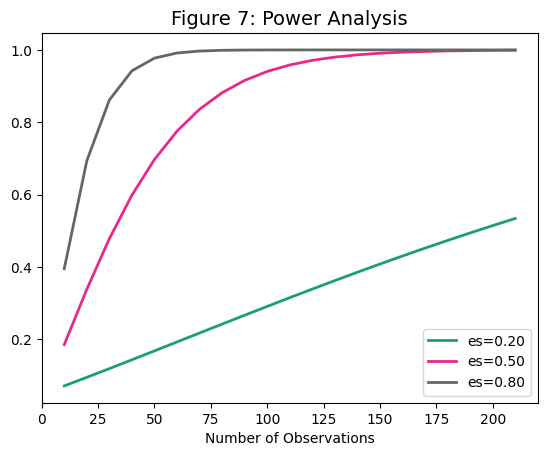

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10,211,10))
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)
plt.title("Figure 7: Power Analysis", size = 14)
plt.show()

ANCOVA - age

In [ ]:
BookedArrest_data[['Age_group__at_arrest_']]=BookedArrest_data[['Age_group__at_arrest_']].astype('object')
ancova(data=BookedArrest_data,dv='Cooperative_count',covar='Booked_count',between='Age_group__at_arrest_')

,Source,SS,DF,F,p-unc,np2
0,Age_group__at_arrest_,4.059594e+05,6,1.936807,7.647881e-02,0.054146
1,Booked_count,1.714817e+06,1,49.087719,3.531313e-11,0.194725
2,Residual,7.091548e+06,203,NaN,NaN,NaN


ANCOVA - race

In [ ]:
origin_data[['Perceived_Race']]=origin_data[['Perceived_Race']].astype('object')
ancova(data=BookedArrest_data,dv='Cooperative_count',covar='Booked_count',between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,1.598543e+05,1,4.531379,0.034455,0.021321
1,Booked_count,8.707177e+05,1,24.682181,0.000001,0.106077
2,Residual,7.337653e+06,208,NaN,NaN,NaN


ANCOVA - sex

In [ ]:
BookedArrest_data[['Sex']]=BookedArrest_data[['Sex']].astype('object')
ancova(data=BookedArrest_data,dv='Cooperative_count',covar='Booked_count',between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,1.065264e+05,1,2.997910,8.485475e-02,0.014208
1,Booked_count,1.127705e+06,1,31.736329,5.689867e-08,0.132380
2,Residual,7.390981e+06,208,NaN,NaN,NaN


Logistic Regression - Y: cooperative

In [4]:
o_data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
o_data = (o_data[o_data['Sex'].str.contains('U') == False])
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 65 and older','Age_group__at_arrest_'] = 'Aged 65 years and older'
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 17 years and younger','Age_group__at_arrest_'] = 'Aged 17 years and under'
o_data.loc[o_data.Youth_at_arrest__under_18_years == 'Youth (aged 17 and younger)','Youth_at_arrest__under_18_years'] = 'Youth (aged 17 years and under)'
X = o_data[['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_','Youth_at_arrest__under_18_years','Booked','StripSearch','Occurrence_Category'
,'Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o']]
y = o_data['Actions_at_arrest___Cooperative']
encoder = LabelEncoder()
arrest_month=pd.get_dummies(X['Arrest_Month'],drop_first=True)
race=pd.get_dummies(X['Perceived_Race'],drop_first=True)
sex=pd.get_dummies(X['Sex'],drop_first=True)
age=pd.get_dummies(X['Age_group__at_arrest_'],drop_first=True)
#youth=pd.get_dummies(X['Youth_at_arrest__under_18_years'],drop_first=True)
X=pd.concat([X,arrest_month,sex,race,age],axis=1)
X['Arrest_Month']=encoder.fit_transform(X['Arrest_Month'])
X['Youth_at_arrest__under_18_years']=encoder.fit_transform(X['Youth_at_arrest__under_18_years'])
X.drop(['Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_','Occurrence_Category'],axis=1,inplace=True)
X=X.replace(np.nan,0)
X.head()

,Arrest_Year,Youth_at_arrest__under_18_years,Booked,StripSearch,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Jan-Mar,...,Middle-Eastern,South Asian,Unknown or Legacy,White,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 years and older
0,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2020,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2021,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,2021,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [5]:
X.columns=X.columns.str.replace(' ','')
X.columns=X.columns.str.replace('-','_')
X.columns=X.columns.str.replace('/','_')
X.columns=X.columns.str.replace('(','')
X.columns=X.columns.str.replace(')','')
X.columns=X.columns.str.replace('_','')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [7]:
all_columns = ' + '.join(X)
formula = "Actions_at_arrest___Cooperative ~ " + all_columns 
print("Formula: ", formula, "\n")
trainingdata = pd.concat([x_train,y_train], axis = 1)
log_reg = smf.logit(formula, data=trainingdata).fit()

Formula:  Actions_at_arrest___Cooperative ~ ArrestYear + Youthatarrestunder18years + Booked + StripSearch + ActionsatarrestConcealedi + ActionsatarrestCombative + ActionsatarrestResistedd + ActionsatarrestMentalinst + ActionsatarrestAssaultedo + JanMar + JulySept + OctDec + M + EastSoutheastAsian + Indigenous + Latino + MiddleEastern + SouthAsian + UnknownorLegacy + White + Aged18to24years + Aged25to34years + Aged35to44years + Aged45to54years + Aged55to64years + Aged65yearsandolder 

Optimization terminated successfully.
         Current function value: 0.646013
         Iterations 10


In [8]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     Actions_at_arrest___Cooperative   No. Observations:                52213
Model:                                       Logit   Df Residuals:                    52186
Method:                                        MLE   Df Model:                           26
Date:                             Mon, 17 Apr 2023   Pseudo R-squ.:                 0.05963
Time:                                     01:00:25   Log-Likelihood:                -33730.
converged:                                    True   LL-Null:                       -35869.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   234.3669     38.851      6.033      0.000     158.221     310.513
ArrestYear                   -0.1164      0.019     -6.055      0.000      -0.154      -0.079
Youthatarrestunder18years     0.5405      0.557      0.971      0.331      -0.550       1.631
Booked                        0.4146      0.019     21.467      0.000       0.377       0.453
StripSearch                  -0.2331      0.032     -7.244      0.000      -0.296      -0.170
ActionsatarrestConcealedi    -0.2725      0.165     -1.647      0.100      -0.597       0.052
ActionsatarrestCombative     -3.1272      0.127    -24.549      0.000      -3.377      -2.878
ActionsatarrestResistedd     -2.7640      0.117    -23.605      0.000      -2.994      -2.535
ActionsatarrestMentalinst    -0.4012      0.062     -6.483      0.000      -0.523      -0.280
ActionsatarrestAssaultedo    -4.5351      1.005     -4.512      0.000      -6.505      -2.565
JanMar                        0.0620      0.026      2.395      0.017       0.011       0.113
JulySept                     -0.0179      0.026     -0.685      0.493      -0.069       0.033
OctDec                       -0.0217      0.027     -0.811      0.417      -0.074       0.031
M                             0.0380      0.023      1.630      0.103      -0.008       0.084
EastSoutheastAsian            0.3177      0.039      8.134      0.000       0.241       0.394
Indigenous                   -0.0077      0.058     -0.134      0.894      -0.120       0.105
Latino                        0.3020      0.058      5.177      0.000       0.188       0.416
MiddleEastern                 0.1077      0.044      2.434      0.015       0.021       0.194
SouthAsian                    0.0868      0.042      2.056      0.040       0.004       0.170
UnknownorLegacy              -0.0031      0.037     -0.084      0.933      -0.076       0.070
White                         0.0643      0.023      2.785      0.005       0.019       0.110
Aged18to24years               0.4348      0.555      0.783      0.434      -0.654       1.523
Aged25to34years               0.4411      0.555      0.794      0.427      -0.647       1.529
Aged35to44years               0.4704      0.555      0.847      0.397      -0.618       1.559
Aged45to54years               0.5113      0.556      0.920      0.357      -0.577       1.600
Aged55to64years               0.4775      0.556      0.859      0.390      -0.612       1.567
Aged65yearsandolder           0.6139      0.559      1.099      0.272      -0.481       1.709
=============================================================================================
"""

In [ ]:
#getting odds ratio 
np.exp(log_reg.params)

Intercept                    6.085124e+101
ArrestYear                    8.901109e-01
Sex                           1.038776e+00
Youthatarrestunder18years     1.716782e+00
Booked                        1.513832e+00
StripSearch                   7.921117e-01
ActionsatarrestConcealedi     7.615084e-01
ActionsatarrestCombative      4.384086e-02
ActionsatarrestResistedd      6.303608e-02
ActionsatarrestMentalinst     6.694882e-01
ActionsatarrestAssaultedo     1.072576e-02
JanMar                        1.063965e+00
JulySept                      9.822210e-01
OctDec                        9.785744e-01
EastSoutheastAsian            1.373900e+00
Indigenous                    9.923321e-01
Latino                        1.352567e+00
MiddleEastern                 1.113757e+00
SouthAsian                    1.090717e+00
UnknownorLegacy               9.968816e-01
White                         1.066421e+00
Aged18to24years               1.544581e+00
Aged25to34years               1.554386e+00
Aged35to44y

In [ ]:
params = log_reg.params
conf = log_reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,5.183830e+68,7.143122e+134,6.085124e+101
ArrestYear,8.571934e-01,9.242926e-01,8.901109e-01
Sex,9.923257e-01,1.087400e+00,1.038776e+00
Youthatarrestunder18years,5.767810e-01,5.109980e+00,1.716782e+00
Booked,1.457593e+00,1.572240e+00,1.513832e+00
StripSearch,7.437074e-01,8.436664e-01,7.921117e-01
ActionsatarrestConcealedi,5.505908e-01,1.053223e+00,7.615084e-01
ActionsatarrestCombative,3.415458e-02,5.627419e-02,4.384086e-02
ActionsatarrestResistedd,5.010905e-02,7.929800e-02,6.303608e-02
ActionsatarrestMentalinst,5.930060e-01,7.558346e-01,6.694882e-01


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
pred = log_reg.predict(x_test)
prediction = list(map(round, pred))
print('\nTest accuracy (Test) = ', accuracy_score(y_test, prediction))


Test accuracy (Test) =  0.5718553700015321


In [ ]:
cm2 = confusion_matrix(y_test, prediction) 
print ("\nConfusion Matrix for test: \n", cm2) 


Confusion Matrix for test: 
 [[4926 2231]
 [3358 2539]]


In [ ]:
pred2 = log_reg.predict(x_train)
prediction1 = list(map(round, pred2))
print('\nTest accuracy (Train) = ', accuracy_score(y_train, prediction1)) 


Test accuracy (Train) =  0.5790894987838278


In [ ]:
cm1 = confusion_matrix(y_train, prediction1) 
print ("\nConfusion Matrix for train: \n", cm1)


Confusion Matrix for train: 
 [[20224  8780]
 [13197 10012]]


Prediction Interval

In [ ]:
coefficients = log_reg.params.values
std_errors = log_reg.bse.values
confidence_level = 0.95 
critical_value = 1.96 
margin_of_errors = critical_value * std_errors
lower_bounds = coefficients - margin_of_errors
upper_bounds = coefficients + margin_of_errors

In [ ]:
pred_f = log_reg.conf_int()
pred_f.columns = ["Lower PI", "Upper PI"]
for i in range(len(coefficients)):
    pred_f['Lower PI'][i]=np.exp(lower_bounds)[i]
    pred_f['Upper PI'][i]=np.exp(upper_bounds)[i]
pred_f

,Lower PI,Upper PI
Intercept,5.176582e+68,7.153124e+134
ArrestYear,8.571928e-01,9.242932e-01
Sex,9.923249e-01,1.087401e+00
Youthatarrestunder18years,5.767694e-01,5.110083e+00
Booked,1.457592e+00,1.572241e+00
StripSearch,7.437065e-01,8.436673e-01
ActionsatarrestConcealedi,5.505875e-01,1.053229e+00
ActionsatarrestCombative,3.415442e-02,5.627445e-02
ActionsatarrestResistedd,5.010884e-02,7.929834e-02
ActionsatarrestMentalinst,5.930047e-01,7.558363e-01


PI plot for Race

In [ ]:
o_data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
o_data = (o_data[o_data['Sex'].str.contains('U') == False])
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 65 and older','Age_group__at_arrest_'] = 'Aged 65 years and older'
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 17 years and younger','Age_group__at_arrest_'] = 'Aged 17 years and under'
o_data.loc[o_data.Youth_at_arrest__under_18_years == 'Youth (aged 17 and younger)','Youth_at_arrest__under_18_years'] = 'Youth (aged 17 years and under)'
raceX=o_data.dropna(subset=['Perceived_Race'])
encoder = LabelEncoder()
raceX['Perceived_Race']=encoder.fit_transform(raceX['Perceived_Race'])
y = o_data['Actions_at_arrest___Cooperative']
mod = sm.Logit.from_formula('Actions_at_arrest___Cooperative ~ Perceived_Race', raceX)
res = mod.fit()
me = res.get_margeff()

Optimization terminated successfully.
         Current function value: 0.687286
         Iterations 4


In [ ]:
Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)
β_ = res.params.values.reshape(-1, 1)
V_ = res.cov_params().values
def var_π(x, β, V_):
    #      λ(z)**s * x.T @ V_ @ x
  prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x)  # maybe this is it?
  return prob
def var_πs(xx, β, V_):
  α = λ(xx.dot(β))**2
  out = np.empty((500, 1))
  for i, x in enumerate(xx):
      out[i] = x.T.dot(V_).dot(x)
  return α * out

In [ ]:
xx = sm.add_constant(np.linspace(raceX.Perceived_Race.min(), raceX.Perceived_Race.max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

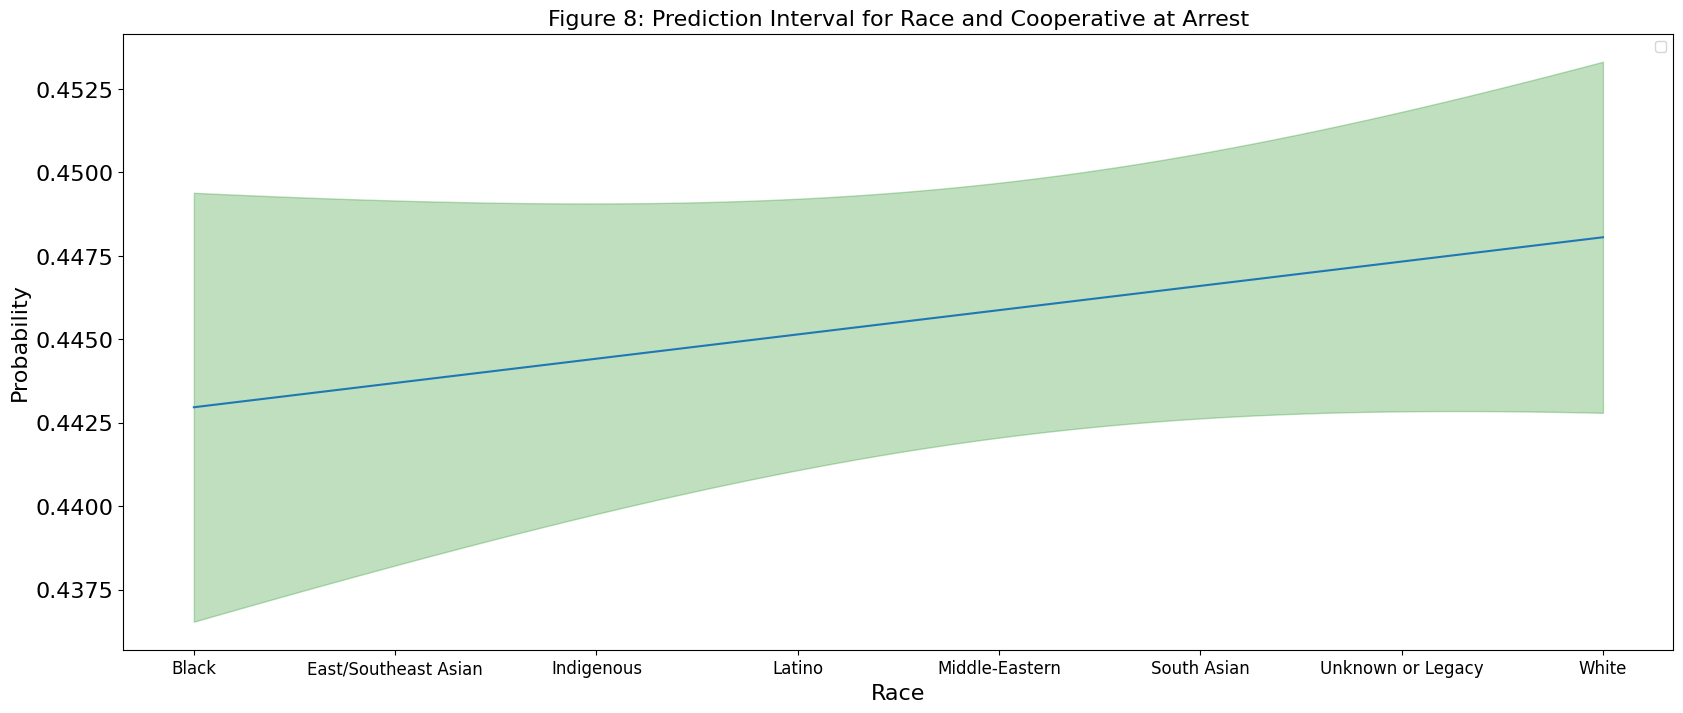

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),alpha=.25, color='g')
plt.xlabel('Race',size=16)
plt.ylabel('Probability',size=16)
x = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
len_x = range(len(x))
plt.xticks(len_x, x, size=12)
plt.yticks(size=16)
plt.title("Figure 8: Prediction Interval for Race and Cooperative at Arrest", size = 16)
plt.legend()
plt.show()

PI plot for Age Group

In [ ]:
o_data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
o_data = (o_data[o_data['Sex'].str.contains('U') == False])
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 65 and older','Age_group__at_arrest_'] = 'Aged 65 years and older'
o_data.loc[o_data.Age_group__at_arrest_ == 'Aged 17 years and younger','Age_group__at_arrest_'] = 'Aged 17 years and under'
o_data.loc[o_data.Youth_at_arrest__under_18_years == 'Youth (aged 17 and younger)','Youth_at_arrest__under_18_years'] = 'Youth (aged 17 years and under)'
ageX=o_data.dropna(subset=['Age_group__at_arrest_'])
encoder = LabelEncoder()
ageX['Age_group__at_arrest_']=encoder.fit_transform(ageX['Age_group__at_arrest_'])
y = o_data['Actions_at_arrest___Cooperative']
mod = sm.Logit.from_formula('Actions_at_arrest___Cooperative ~ Age_group__at_arrest_', ageX)
res = mod.fit()
me = res.get_margeff()

Optimization terminated successfully.
         Current function value: 0.687227
         Iterations 4


In [ ]:
xx = sm.add_constant(np.linspace(ageX.Age_group__at_arrest_.min(), ageX.Age_group__at_arrest_.max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

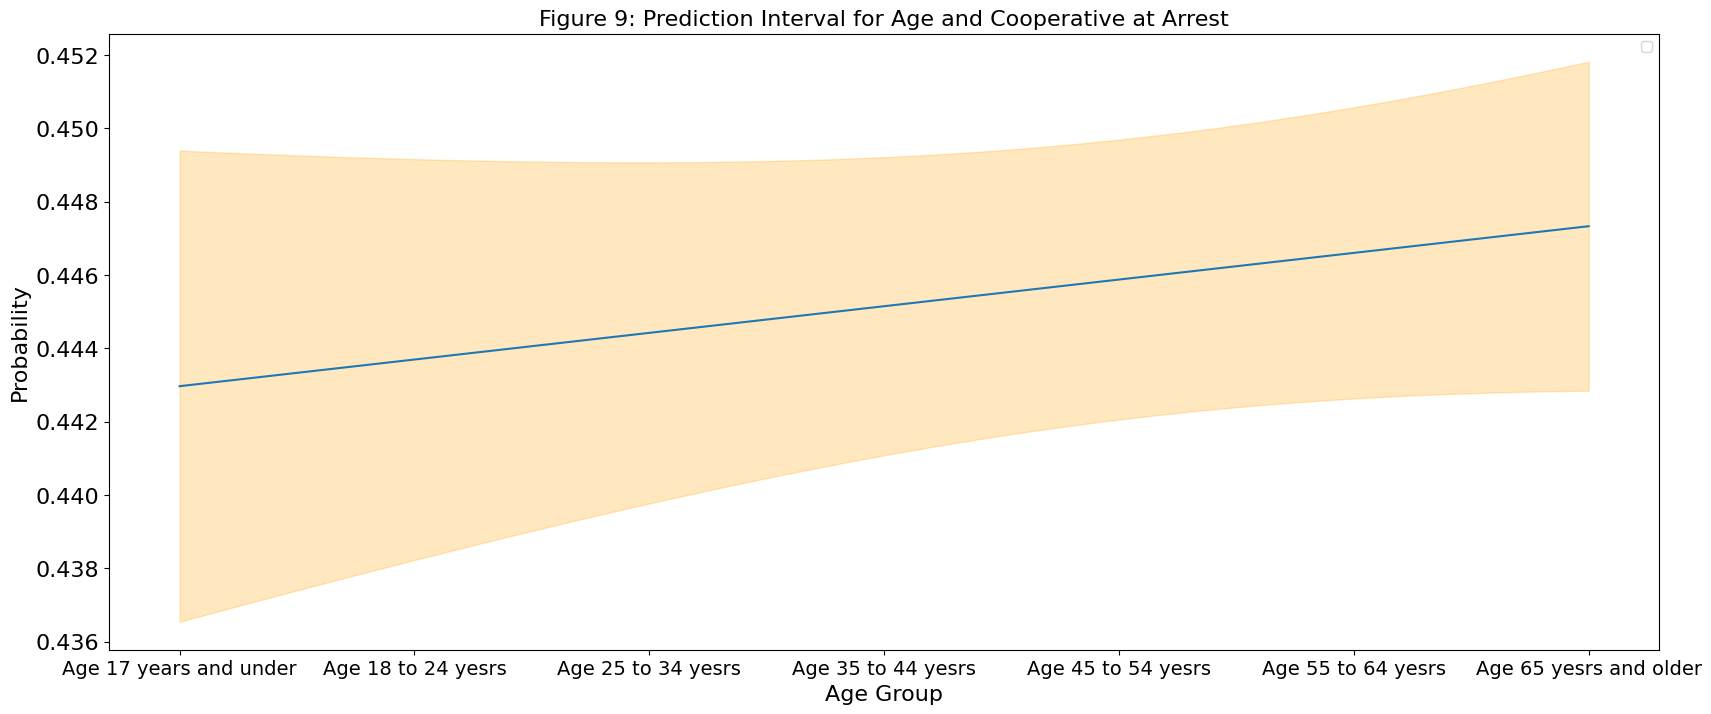

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),alpha=.25, color='orange')
plt.xlabel('Age Group',size=16)
plt.ylabel('Probability',size=16)
x=['Age 17 years and under','Age 18 to 24 yesrs','Age 25 to 34 yesrs','Age 35 to 44 yesrs','Age 45 to 54 yesrs','Age 55 to 64 yesrs','Age 65 yesrs and older']
plt.xticks(range(len(x)),x,size=14)
plt.yticks(size=16)
plt.title("Figure 9: Prediction Interval for Age and Cooperative at Arrest", size = 16)
plt.legend()
plt.show()